In [1]:
import pandas as pd
import seaborn as sns

In [2]:
all_sales = pd.read_csv('data/Sum_of_Rooms_and_Sum_1724677689217.csv')
all_sales.head()

,listing_id,address,unit,source,property_type_code,luxury_status,list_date,contract_date,sold_date,original_list_price,...,resale_or_sponsor,key,year,qtr,week,neighborhood,neighborhood_group,borough,rooms,bedrooms
0,7512983,150-40 71st Avenue,3k,mlsli,Cooperative,standard,2023-03-13 00:00:00,2023-11-10 00:00:00,2024-08-24 00:00:00,352000.0,...,NaN,1278;1400;1416;1764,2024,3,34,Kew Gardens Hills,Northeastern Queens,Queens,5.0,2.0
1,7746123,211 Central Park West,3BD,rls,Cooperative,standard,2023-10-03 00:00:00,2024-05-24 00:00:00,2024-08-24 00:00:00,4500000.0,...,False,1278;1279;1333;1890,2024,3,34,Upper West Side,All Upper West Side,Manhattan,5.0,2.0
2,7962068,629 East 52nd Street,NaN,rls,Single-Family Townhouse,standard,2024-03-15 00:00:00,2024-05-20 00:00:00,2024-08-24 00:00:00,550000.0,...,False,1278;1337;1338;1697,2024,3,34,Northeast Flatbush,Central Brooklyn,Brooklyn,6.0,3.0
3,8056703,201 East 17th Street,24J,rls,Cooperative,standard,2024-03-19 00:00:00,2024-05-21 00:00:00,2024-08-24 00:00:00,899000.0,...,False,1278;1279;1280;1675,2024,3,34,Gramercy,All Downtown,Manhattan,3.0,1.0
4,8360115,1 Clinton Street,33B,rls,Condominium,standard,2024-04-25 00:00:00,2024-07-19 00:00:00,2024-08-24 00:00:00,4995000.0,...,False,1278;1337;1354;1730,2024,3,34,Brooklyn Heights,Northern Brooklyn,Brooklyn,6.0,4.0


In [22]:
all_sales.groupby(['resale_or_sponsor'])['psqft'].mean()

resale_or_sponsor
False     750.215094
True     1515.830217
Name: psqft, dtype: float64

In [20]:
all_sales.groupby(['borough', 'resale_or_sponsor'])['listing_id'].nunique()

borough    resale_or_sponsor
Bronx      False                 260
           True                   50
Brooklyn   False                2645
           True                 1772
Manhattan  False                7957
           True                 2594
Queens     False                 626
           True                  826
Name: listing_id, dtype: int64

In [3]:
all_sales.columns

Index(['listing_id', 'address', 'unit', 'source', 'property_type_code',
       'luxury_status', 'list_date', 'contract_date', 'sold_date',
       'original_list_price', 'contract_price', 'sold_price', 'square_feet',
       'psqft', 'sales_num', 'resale_or_sponsor', 'key', 'year', 'qtr', 'week',
       'neighborhood', 'neighborhood_group', 'borough', 'rooms', 'bedrooms'],
      dtype='object')

In [4]:
bk_all_sales = all_sales[(all_sales['borough'] == 'Brooklyn') & (all_sales['sales_num'] == 1)][['listing_id', 'address', 'unit', 'key','luxury_status', 'resale_or_sponsor',
                                                                                                'year', 'qtr', 'week', 'psqft', 'neighborhood', 'neighborhood_group']].dropna(subset='psqft')
bk_all_sales['psqft'] = bk_all_sales['psqft'].astype('float')
bk_all_sales.head()

,listing_id,address,unit,key,luxury_status,resale_or_sponsor,year,qtr,week,psqft,neighborhood,neighborhood_group
2,7962068,629 East 52nd Street,NaN,1278;1337;1338;1697,standard,False,2024,3,34,446.0,Northeast Flatbush,Central Brooklyn
4,8360115,1 Clinton Street,33B,1278;1337;1354;1730,standard,False,2024,3,34,1892.0,Brooklyn Heights,Northern Brooklyn
6,35172757,1 CITY PT,48C,1278;1337;1354;1727,standard,True,2024,3,34,1935.0,Downtown Brooklyn,Northern Brooklyn
12,7804375,330 Lenox Road,7L,1278;1337;1338;1699,standard,NaN,2024,3,34,495.0,Flatbush,Central Brooklyn
19,7944852,481 Putnam Avenue,NaN,1278;1337;1354;1705,luxury,False,2024,3,34,842.0,Bed Stuy,Northern Brooklyn


<Axes: xlabel='neighborhood_group'>

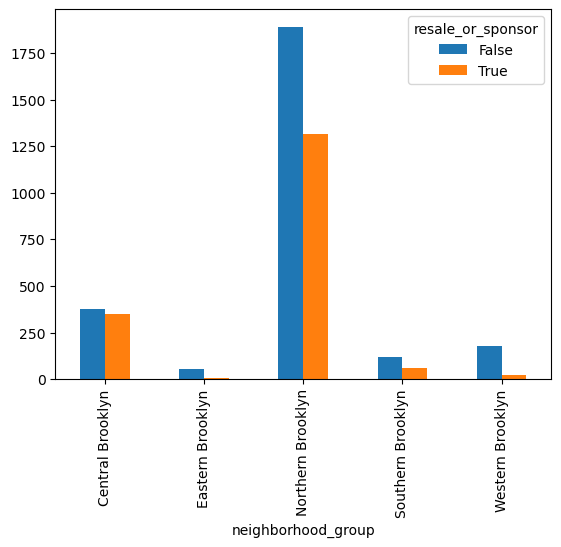

In [5]:
bk_all_sales.groupby(['neighborhood_group', 'resale_or_sponsor']).count()['key'].unstack().plot.bar()

In [6]:
bk_all_sales = all_sales[(all_sales['neighborhood_group'] == 'Northern Brooklyn')]

In [13]:
bk_all_sales_grouped = bk_all_sales.groupby(['neighborhood', 'resale_or_sponsor', 'year', 'qtr'])
bk_all_sales_grouped['psqft'].mean().to_clipboard()

In [12]:
bk_all_sales_grouped['listing_id'].nunique().to_clipboard()

In [17]:
bk_all_sales[bk_all_sales['resale_or_sponsor'] == True].groupby('neighborhood').count()['listing_id'].to_clipboard()

In [10]:
# TODO: cumulative price per sqft

In [18]:
bk_all_sales.groupby(['neighborhood', 'year', 'qtr'])['psqft'].mean().to_clipboard()

In [23]:
bk_all_sales.groupby(['resale_or_sponsor'])['psqft'].mean()

resale_or_sponsor
False     841.390871
True     1388.599850
Name: psqft, dtype: float64